In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
df_review = pd.read_csv("/Users/amirahnurazman/Downloads/IMDB Dataset.csv")

df_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df_review.shape

(50000, 2)

In [4]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df_review.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df_review['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

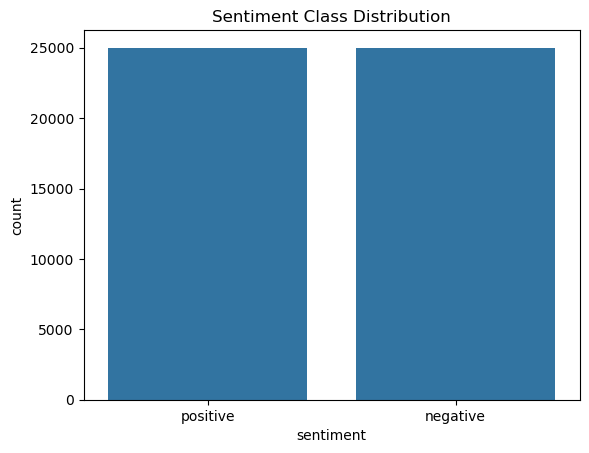

In [72]:
# Distribution of sentiment labels

sns.countplot(x='sentiment', data=df_review)
plt.title("Sentiment Class Distribution")
plt.show()

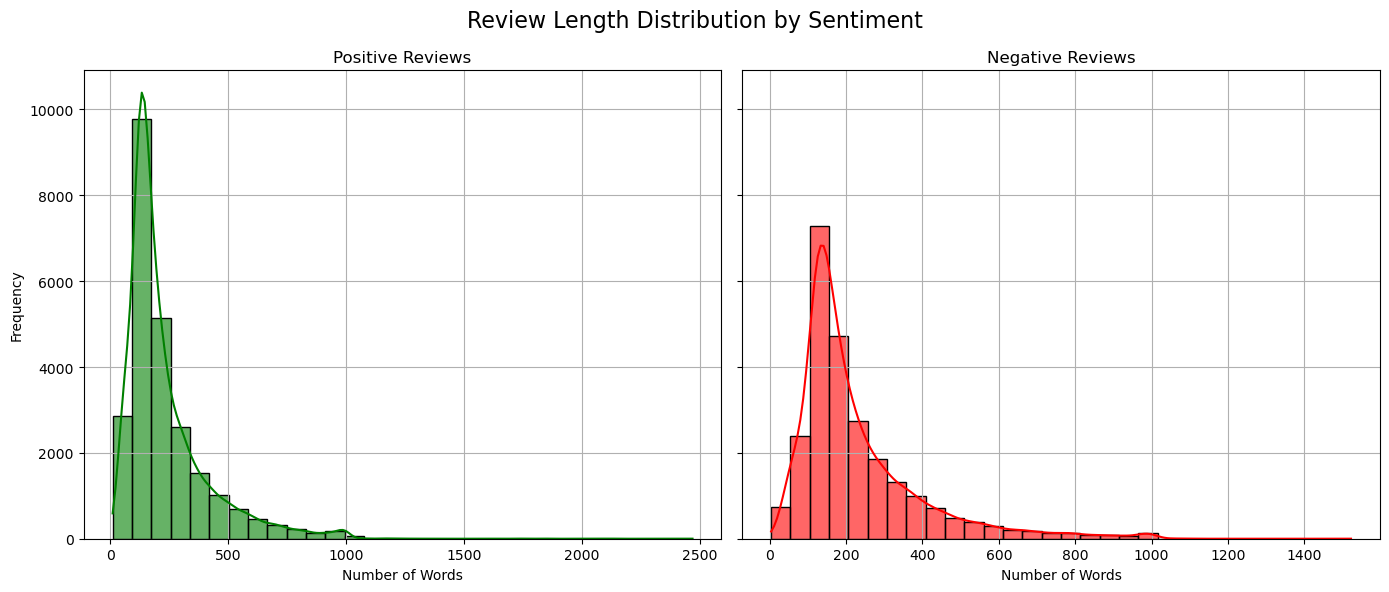

In [101]:
# Histogram of the number of words per review.
df_review['review_length'] = df_review['review'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=df_review[df_review['sentiment'] == 'positive'], x='review_length', bins=30, kde=True, color='green', ax=axes[0], alpha=0.6)
axes[0].set_title("Positive Reviews")
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

sns.histplot(data=df_review[df_review['sentiment'] == 'negative'], x='review_length', bins=30, kde=True, color='red', ax=axes[1], alpha=0.6)
axes[1].set_title("Negative Reviews")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("")
axes[1].grid(True)

plt.suptitle("Review Length Distribution by Sentiment", fontsize=16)
plt.tight_layout()
plt.show()

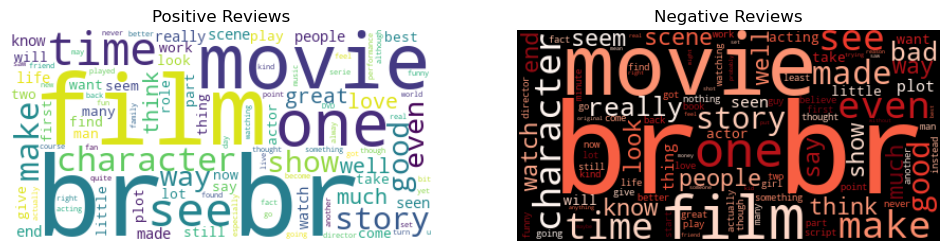

In [75]:
from wordcloud import WordCloud

positive_reviews = " ".join(df_review[df_review['sentiment']=='positive']['review'])
negative_reviews = " ".join(df_review[df_review['sentiment']=='negative']['review'])

wordcloud_pos = WordCloud(max_words=100, background_color="white").generate(positive_reviews)
wordcloud_neg = WordCloud(max_words=100, background_color="black", colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis('off')
plt.title("Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_review['review'], df_review['sentiment'], 
                                                    test_size=0.2, random_state=42, stratify=df_review['sentiment'])

print('Training set:',len(X_train), '\nTarget class:', y_train.value_counts())
print('Test set:',len(X_test), '\nTarget class:', y_test.value_counts())

Training set: 40000 
Target class: sentiment
positive    20000
negative    20000
Name: count, dtype: int64
Test set: 10000 
Target class: sentiment
negative    5000
positive    5000
Name: count, dtype: int64


In [47]:
# Text Preprocessing
# Change to lower case
# Remove HTML tags
# Remove punctuation 
# Remove special characters 
# Tokenization
# Remove stopwords
# Stemming or lemmatization

from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
stop_words = set(stopwords.words("english")) 
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocessing_text(text):
    clean_text = text.lower()
    clean_text = BeautifulSoup(clean_text, "html.parser").get_text()
    clean_text = clean_text.translate(str.maketrans('','',string.punctuation))
    clean_text = re.sub(r'[^a-zA-Z\s]', '',clean_text)
    words = word_tokenize(clean_text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)
    
df_review["cleaned_review"] = df_review["review"].apply(preprocessing_text)
df_review["cleaned_sentiment"] = df_review["sentiment"].map({"positive":1, "negative":0})

df_review.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirahnurazman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/amirahnurazman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amirahnurazman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_42267/4203118329.py:28: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(clean_text, "html.parser").get_text()


,review,sentiment,cleaned_review,cleaned_sentiment
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1


In [48]:
# Applied func to train and test set
X_train = X_train.apply(preprocessing_text)
X_test = X_test.apply(preprocessing_text)

y_train = y_train.map({"positive":1, "negative":0})
y_test = y_test.map({"positive":1, "negative":0})

print(X_train.head())
print("\n",y_train.head())

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_42267/4203118329.py:28: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(clean_text, "html.parser").get_text()


47808    caught little gem totally accident back reviva...
20154    cant believe let movie accomplish favor friend...
43069    spoiler alert get nerve people remake use term...
19413    there one thing ive learnt watching george rom...
13673    remember theater review said horrible well did...
Name: review, dtype: object

 47808    1
20154    0
43069    0
19413    0
13673    0
Name: sentiment, dtype: int64


In [11]:
# Text Vectorization

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Modeling 
# Naive Bayes, SGD, XGBoost classifier 

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
print("MultinomialNB Acccuracy:\n", accuracy_nb)
print("MultinomialNB Results:\n", classification_report(y_test, y_pred_nb, target_names=['Positive','Negative']))

sgd = SGDClassifier(loss="hinge", penalty="l2", alpha=1e-3, random_state=42)
sgd.fit(X_train_tfidf, y_train)
y_pred_sgd = sgd.predict(X_test_tfidf)
accuracy_sgd = metrics.accuracy_score(y_test, y_pred_sgd)
print("SGD Acccuracy:\n", accuracy_sgd)
print("SGD Results:\n", classification_report(y_test, y_pred_sgd, target_names=['Positive','Negative']))

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
print("XGBClassifier Acccuracy:\n", accuracy_xgb)
print("XGBClassifier Results:\n", classification_report(y_test, y_pred_xgb, target_names=['Positive','Negative']))

MultinomialNB Acccuracy:
 0.8634
MultinomialNB Results:
               precision    recall  f1-score   support

    Positive       0.85      0.88      0.87      5000
    Negative       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

SGD Acccuracy:
 0.8474
SGD Results:
               precision    recall  f1-score   support

    Positive       0.90      0.78      0.84      5000
    Negative       0.80      0.92      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:17:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier Acccuracy:
 0.8564
XGBClassifier Results:
               precision    recall  f1-score   support

    Positive       0.87      0.84      0.85      5000
    Negative       0.84      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



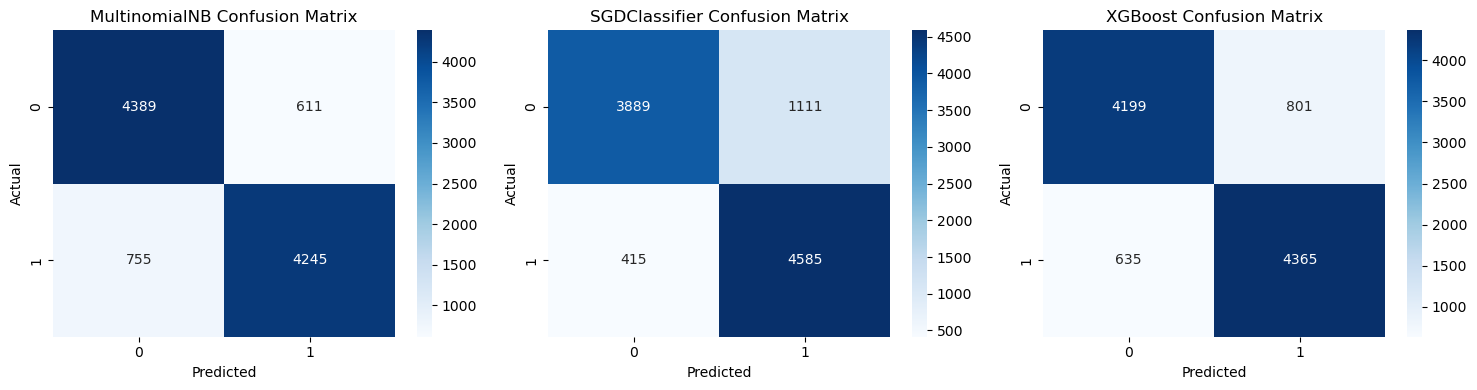

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 4))
for i, (model_name, y_pred) in enumerate({
    "MultinomialNB": y_pred_nb,
    "SGDClassifier": y_pred_sgd,
    "XGBoost": y_pred_xgb
}.items()):
    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

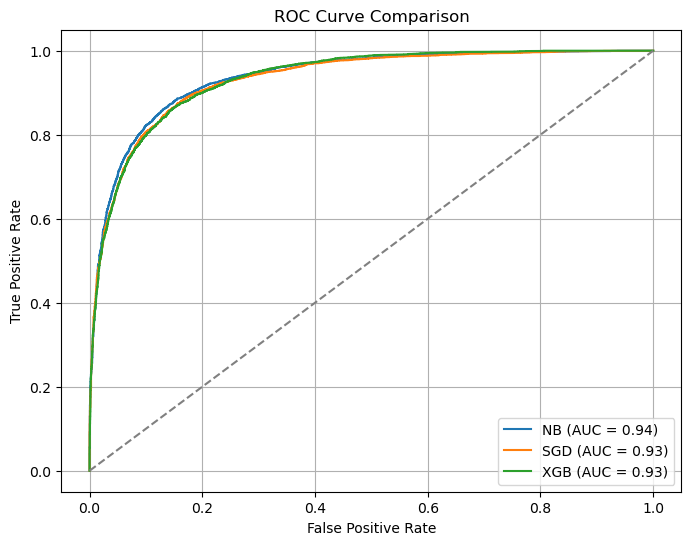

In [92]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Get predicted probabilities
y_score_nb = nb.predict_proba(X_test_tfidf)[:, 1]
y_score_sgd = sgd.decision_function(X_test_tfidf)  
y_score_xgb = xgb.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curves and AUCs
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, y_score_nb)
fpr_sgd, tpr_sgd, _ = roc_curve(y_test_bin, y_score_sgd)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, y_score_xgb)

auc_nb = auc(fpr_nb, tpr_nb)
auc_sgd = auc(fpr_sgd, tpr_sgd)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB (AUC = {auc_nb:.2f})')
plt.plot(fpr_sgd, tpr_sgd, label=f'SGD (AUC = {auc_sgd:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [106]:
# Most significant words across all reviews based only on TF-IDF scores

from sklearn.feature_extraction.text import TfidfVectorizer

positive_reviews = df_review[df_review['sentiment'] == 'positive']['review']
negative_reviews = df_review[df_review['sentiment'] == 'negative']['review']

tfidf_pos = TfidfVectorizer(stop_words='english', max_features=5000)
X_pos = tfidf_pos.fit_transform(positive_reviews)

tfidf_neg = TfidfVectorizer(stop_words='english', max_features=5000)
X_neg = tfidf_neg.fit_transform(negative_reviews)

# Get average TF-IDF scores
avg_tfidf_pos = X_pos.mean(axis=0).A1
avg_tfidf_neg = X_neg.mean(axis=0).A1

words_pos = tfidf_pos.get_feature_names_out()
words_neg = tfidf_neg.get_feature_names_out()

top_n = 10
top_pos_indices = np.argsort(avg_tfidf_pos)[-top_n:]
top_neg_indices = np.argsort(avg_tfidf_neg)[-top_n:]

top_pos_df = pd.DataFrame({
    'word': words_pos[top_pos_indices],
    'tfidf_score': avg_tfidf_pos[top_pos_indices]
}).sort_values(by='tfidf_score', ascending=True)

top_neg_df = pd.DataFrame({
    'word': words_neg[top_neg_indices],
    'tfidf_score': avg_tfidf_neg[top_neg_indices]
}).sort_values(by='tfidf_score', ascending=True)

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_42267/2618479417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tfidf_score', y='word', data=top_pos_df, palette='Greens_d')
/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_42267/2618479417.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tfidf_score', y='word', data=top_neg_df, palette='Reds_d')


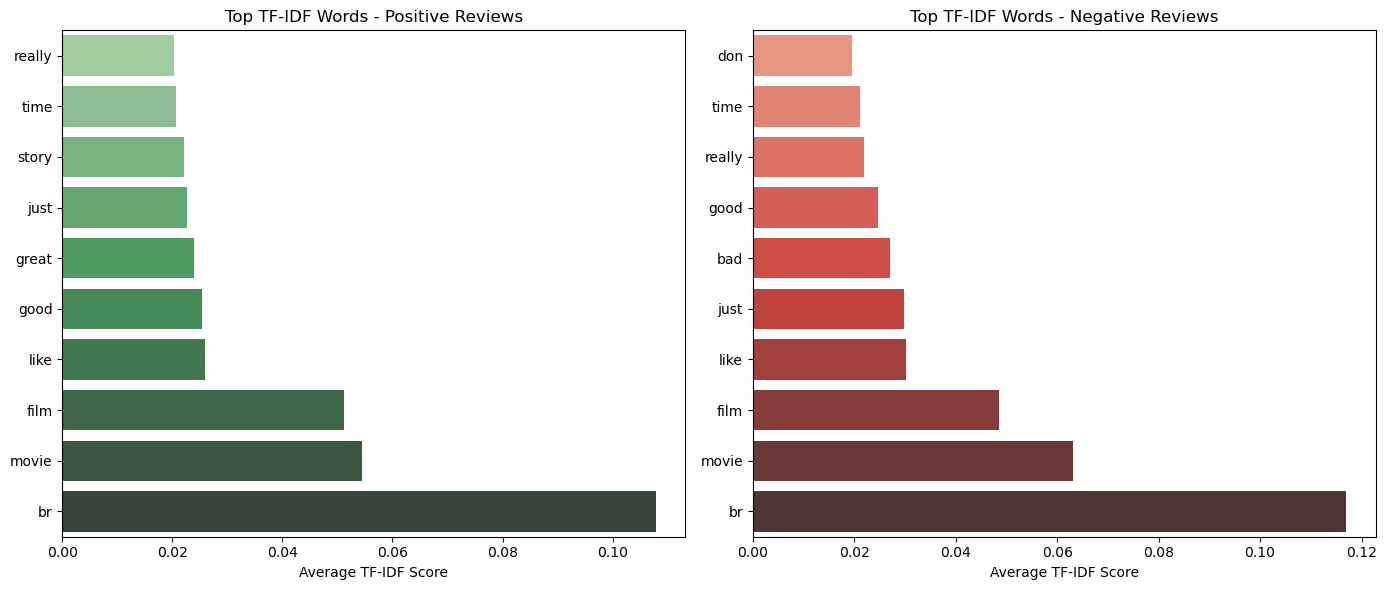

In [107]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.barplot(x='tfidf_score', y='word', data=top_pos_df, palette='Greens_d')
plt.title("Top TF-IDF Words - Positive Reviews")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("")

plt.subplot(1, 2, 2)
sns.barplot(x='tfidf_score', y='word', data=top_neg_df, palette='Reds_d')
plt.title("Top TF-IDF Words - Negative Reviews")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("")

plt.tight_layout()
plt.show()

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_42267/3900784851.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='word', data=top_pos_df, ax=axes[0], palette='Greens_d')
/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_42267/3900784851.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='word', data=top_neg_df, ax=axes[1], palette='Reds_d')


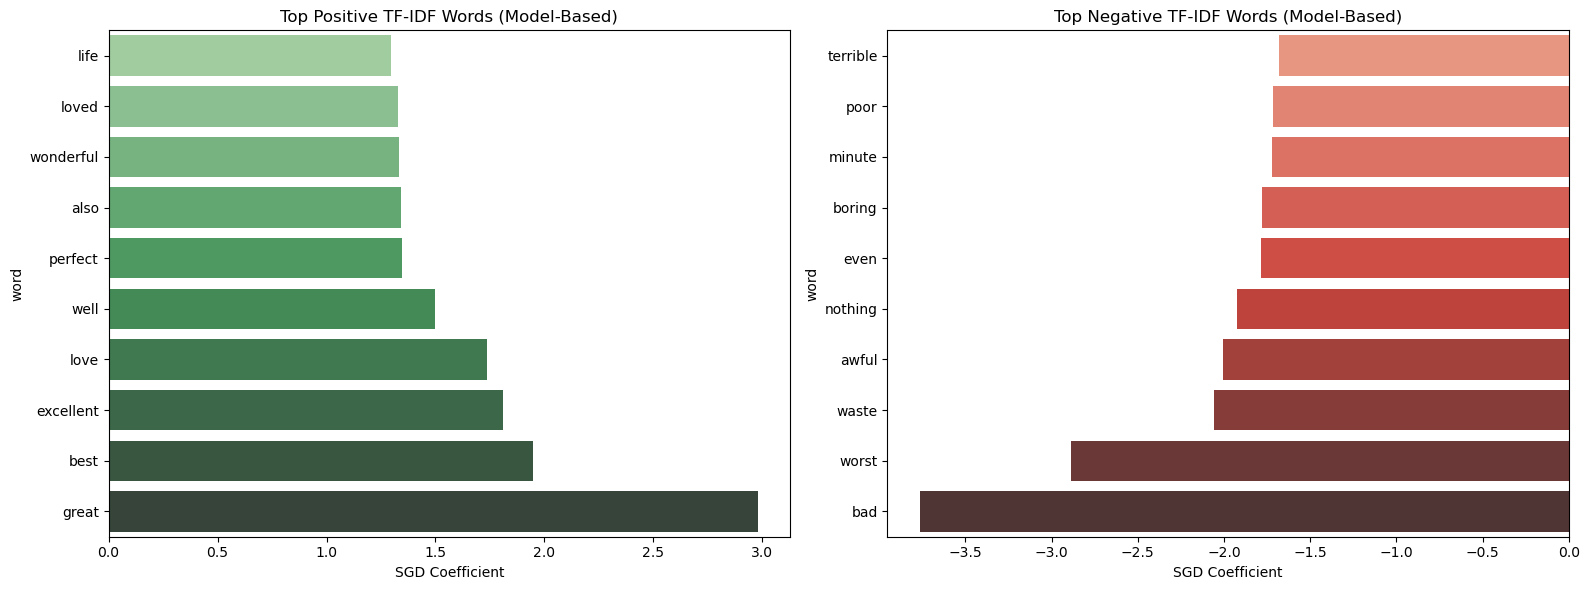

In [102]:
# Words cause a review to be predicted as positive or negative?

# Get coefficients from trained SGDClassifier
coefs = sgd.coef_[0]

# Top 10 positive and negative words
top_pos_indices = np.argsort(coefs)[-10:]
top_neg_indices = np.argsort(coefs)[:10]

top_pos_df = pd.DataFrame({
    'word': feature_names[top_pos_indices],
    'coef': coefs[top_pos_indices]
}).sort_values(by='coef', ascending=True)

top_neg_df = pd.DataFrame({
    'word': feature_names[top_neg_indices],
    'coef': coefs[top_neg_indices]
}).sort_values(by='coef', ascending=False)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(x='coef', y='word', data=top_pos_df, ax=axes[0], palette='Greens_d')
axes[0].set_title("Top Positive TF-IDF Words (Model-Based)")
axes[0].set_xlabel("SGD Coefficient")

sns.barplot(x='coef', y='word', data=top_neg_df, ax=axes[1], palette='Reds_d')
axes[1].set_title("Top Negative TF-IDF Words (Model-Based)")
axes[1].set_xlabel("SGD Coefficient")

plt.tight_layout()
plt.show()

In [49]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=1000,  
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',  
    lower=True, 
    split=' ',  
    char_level=False,  
    oov_token="<OOV>" 
)

print("Tokenizer initialized successfully!")

Tokenizer initialized successfully!


In [50]:
# Fit tokeninzer and assign sequences
tokenizer.fit_on_texts(X_train)  

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding with max_length
from keras.preprocessing.sequence import pad_sequences

max_len = max(len(seq) for seq in X_train_seq)  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

In [53]:
# Print the first 10 words in word_index
top_words = {k: word_index[k] for k in list(word_index.keys())[:10]}
print(top_words)

{'<OOV>': 1, 'movie': 2, 'film': 3, 'one': 4, 'like': 5, 'time': 6, 'good': 7, 'character': 8, 'get': 9, 'even': 10}


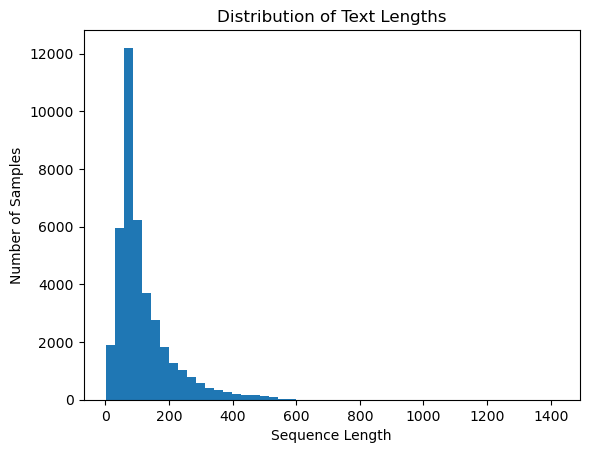

50th percentile: 88.0
75th percentile: 145.0
90th percentile: 234.0
95th percentile: 306.0


In [141]:
# Check length of each sequence
seq_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(X_train)]

import matplotlib.pyplot as plt
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Number of Samples")
plt.title("Distribution of Text Lengths")
plt.show()

# Print some percentiles
import numpy as np
for p in [50, 75, 90, 95]:
    print(f"{p}th percentile: {np.percentile(seq_lengths, p)}")



In [140]:
# Check what proportion of padded data is just padding (0s)

padding_ratio = np.mean(X_train_pad == 0)
print(f"Padding proportion in X_train_pad: {padding_ratio:.2%}")

🧐 Padding proportion in X_train_pad: 91.64%


In [142]:
# Padding with max_length = 200
max_length = 200

X_train_pad2 = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_pad2 = pad_sequences(X_test_seq, maxlen=max_length, padding="post")

In [143]:
# Check what proportion of padded data 

padding_ratio_2 = np.mean(X_train_pad2 == 0)
print(f"Padding proportion in X_train_pad_2: {padding_ratio_2:.2%}")

🧐 Padding proportion in X_train_pad_2: 47.58%


In [14]:
# GloVe
# Load GloVe 

def load_glove_embeddings(glove_path, embedding_dim):
    embeddings_index = {}
    with open(glove_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]  
            coefs = np.asarray(values[1:], dtype="float32")  
            embeddings_index[word] = coefs
    return embeddings_index

glove_path = "/Users/amirahnurazman/Downloads/glove.6B/glove.6B.100d.txt"
embedding_dim = 100
glove_embeddings = load_glove_embeddings(glove_path, embedding_dim)


embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [144]:
# LSTM
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from keras.optimizers import Adam

model_lstm_one = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=200,
              trainable=True),

    LSTM(64),

    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model_lstm_one.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=["accuracy"])

history = model_lstm_one.fit(X_train_pad2, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad2, y_test))

lstm_loss_one, lstm_acc_one = model_lstm_one.evaluate(X_test_pad2, y_test)
print(f"Final LSTM Accuracy: {lstm_acc_one:.4f}")
model_lstm_one.summary()

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 67ms/step - accuracy: 0.5041 - loss: 0.6913 - val_accuracy: 0.5071 - val_loss: 0.6987
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.5293 - loss: 0.6882 - val_accuracy: 0.5266 - val_loss: 0.6870
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.5658 - loss: 0.6787 - val_accuracy: 0.6177 - val_loss: 0.6739
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.6033 - loss: 0.6664 - val_accuracy: 0.5535 - val_loss: 0.6764
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.5678 - loss: 0.6673 - val_accuracy: 0.6920 - val_loss: 0.6162
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6928 - loss: 0.6155
✅ Final LSTM Accuracy: 0.6920


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (32, 200, 100)         │    17,559,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (32, 64)               │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,811,561 (201.46 MB)

 Trainable params: 17,603,853 (67.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,207,708 (134.31 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      5000
           1       0.72      0.63      0.67      5000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



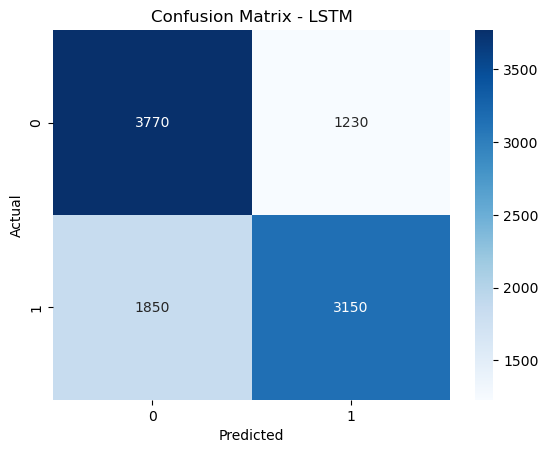

In [147]:
y_pred_lstm_one = (model_lstm_one.predict(X_test_pad2) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_lstm_one))

cm_lstm_one = confusion_matrix(y_test, y_pred_lstm_one)
sns.heatmap(cm_lstm_one, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


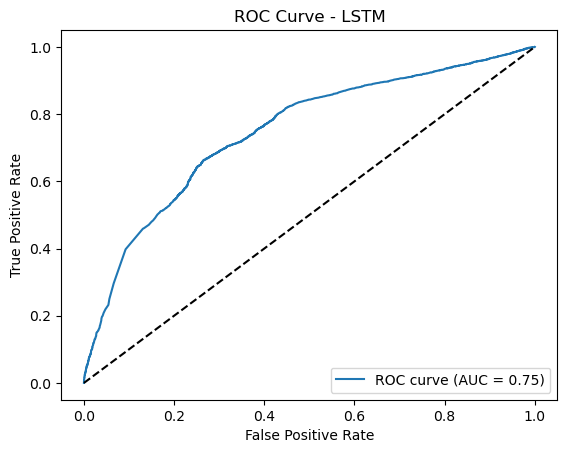

In [149]:
from sklearn.metrics import roc_curve, auc

y_proba_lstm_one = model_lstm_one.predict(X_test_pad2)
fpr_lstm_one, tpr_lstm_one, threshold_one = roc_curve(y_test, y_proba_lstm_one)
roc_auc_lstm_one = auc(fpr_lstm_one, tpr_lstm_one)

plt.figure()
plt.plot(fpr_lstm_one, tpr_lstm_one, label=f"ROC curve (AUC = {roc_auc_lstm_one:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM")
plt.legend(loc="lower right")
plt.show()

In [151]:
# CNN

from keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, 
              output_dim=embedding_dim, 
              weights=[embedding_matrix], 
              input_length=200, 
              trainable=False),

    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),

    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model_cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model_cnn.fit(X_train_pad2, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad2, y_test))

# Evaluate CNN
cnn_loss, cnn_acc = model_cnn.evaluate(X_test_pad2, y_test)
print(f"CNN Accuracy: {cnn_acc:.4f}")
model_cnn.summary()

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6879 - loss: 0.5676 - val_accuracy: 0.8129 - val_loss: 0.4091
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8208 - loss: 0.4073 - val_accuracy: 0.8228 - val_loss: 0.3864
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8493 - loss: 0.3542 - val_accuracy: 0.8403 - val_loss: 0.3628
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8700 - loss: 0.3166 - val_accuracy: 0.8379 - val_loss: 0.3689
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8892 - loss: 0.2747 - val_accuracy: 0.8427 - val_loss: 0.3797
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3817 
CNN Accuracy: 0.8427


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (32, 200, 100)         │    17,559,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (32, 196, 128)         │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (32, 128)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 32)               │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,764,369 (67.77 MB)

 Trainable params: 68,289 (266.75 KB)

 Non-trainable params: 17,559,500 (66.98 MB)

 Optimizer params: 136,580 (533.52 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5000
           1       0.83      0.86      0.85      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



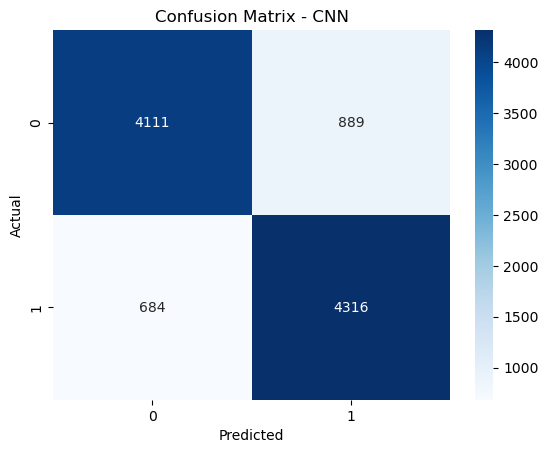

In [152]:
y_pred_cnn = (model_cnn.predict(X_test_pad2) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_cnn))

cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


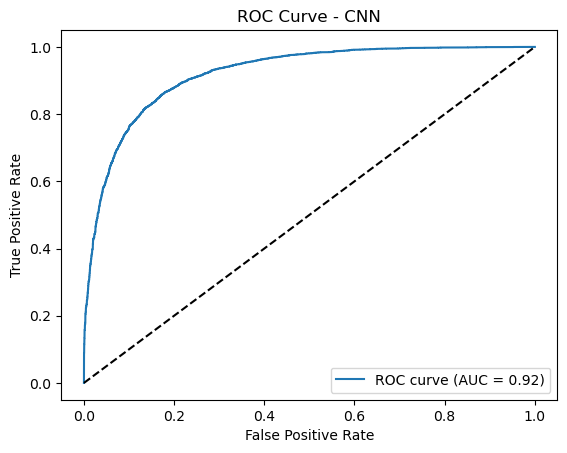

In [153]:
from sklearn.metrics import roc_curve, auc

y_proba_cnn = model_cnn.predict(X_test_pad2)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_cnn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN")
plt.legend(loc="lower right")
plt.show()

In [160]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# MultinomialNB Tuning
nb_params = {'alpha': [0.1, 0.5, 1.0, 2.0]}
grid_nb = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy')
grid_nb.fit(X_train_tfidf, y_train)

print("Best NB Parameters:", grid_nb.best_params_)
print("Best NB Accuracy:", grid_nb.best_score_)

y_pred_nb_tuned = grid_nb.predict(X_test_tfidf)
print("Tuned NB Test Accuracy:", metrics.accuracy_score(y_test, y_pred_nb_tuned))


# SGDClassifier Tuning
sgd_params = {
    'loss': ['hinge', 'log_loss'],
    'alpha': [1e-3, 1e-4, 1e-5],
    'penalty': ['l2', 'l1'],
    'max_iter': [1000, 2000]
}

grid_sgd = GridSearchCV(SGDClassifier(random_state=42), sgd_params, cv=5, scoring='accuracy')
grid_sgd.fit(X_train_tfidf, y_train)

print("Best SGD Parameters:", grid_sgd.best_params_)
print("Best SGD Accuracy:", grid_sgd.best_score_)

y_pred_sgd_tuned = grid_sgd.predict(X_test_tfidf)
print("Tuned SGD Test Accuracy:", metrics.accuracy_score(y_test, y_pred_sgd_tuned))


# XGBoost Classifier Tuning 
xgb_param_grid = {
    "n_estimators": [100],          
    "max_depth": [3, 6],            
    "learning_rate": [0.1],         
    "subsample": [1.0, 0.8]         
}

xgb_best_score = 0
xgb_best_params = {}

for n in xgb_param_grid['n_estimators']:
    for d in xgb_param_grid['max_depth']:
        for lr in xgb_param_grid['learning_rate']:
            for ss in xgb_param_grid['subsample']:
                
                model = XGBClassifier(n_estimators=n, 
                                      max_depth=d, 
                                      learning_rate=lr, 
                                      subsample=ss, 
                                      use_label_encoder=False, 
                                      eval_metric='logloss')
                
                model.fit(X_train_tfidf, y_train)
                
                y_pred_xgb_tuned = model.predict(X_test_tfidf)
                
                acc_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
                
                print(f"n_estimators={n}, max_depth={d}, learning_rate={lr}, subsample={ss}, accuracy={acc_xgb_tuned:.4f}")
            
                if acc_xgb_tuned > xgb_best_score:
                    xgb_best_score = acc_xgb_tuned
                    xgb_best_params = {'n_estimators': n, 'max_depth': d, 'learning_rate': lr, 'subsample': ss}
                    
print("Best XGBoost Parameters:", xgb_best_params)
print("Best XGBoost Accuracy:", xgb_best_score)

Best NB Parameters: {'alpha': 1.0}
Best NB Accuracy: 0.861675
Tuned NB Test Accuracy: 0.8634
Best SGD Parameters: {'alpha': 1e-05, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l2'}
Best SGD Accuracy: 0.891875
Tuned SGD Test Accuracy: 0.8973


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:43:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0, accuracy=0.8055


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:43:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8, accuracy=0.8071


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:44:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


n_estimators=100, max_depth=6, learning_rate=0.1, subsample=1.0, accuracy=0.8278


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:44:25] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, accuracy=0.8272
Best XGBoost Parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 1.0}
Best XGBoost Accuracy: 0.8278



Classification Report for MultinomialNB:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5000
           1       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Classification Report for SGDClassifier:

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      5000
           1       0.80      0.86      0.83      5000

    accuracy                           0.83     10000
   ma

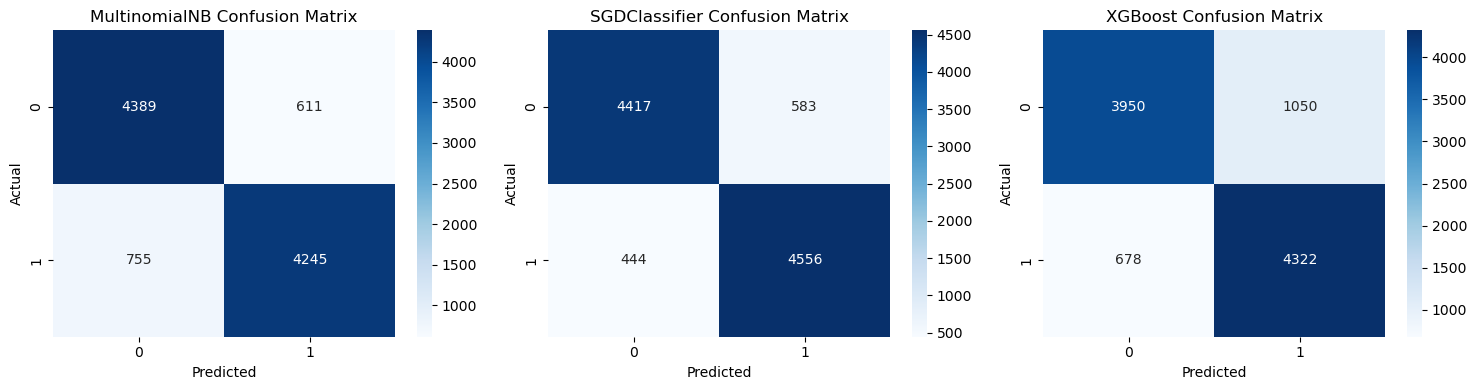

In [163]:
# Confusion matrix hyperparameter tuning 

plt.figure(figsize=(15, 4))

predictions = {
    "MultinomialNB": y_pred_nb_tuned,
    "SGDClassifier": y_pred_sgd_tuned,
    "XGBoost": y_pred_xgb_tuned
}

for i, (model_name, y_pred) in enumerate(predictions.items()):
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

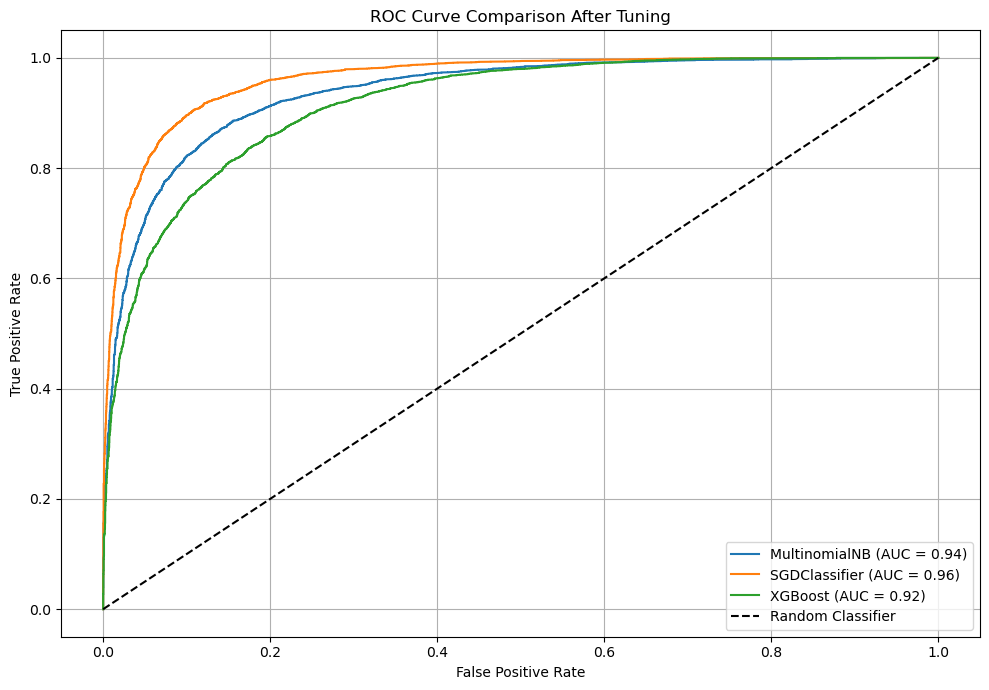

In [167]:
# Get predicted probabilities for ROC curve

plt.figure(figsize=(10, 7))

model_preds_proba = {
    "MultinomialNB": grid_nb.predict_proba(X_test_tfidf)[:, 1],
    "SGDClassifier": grid_sgd.decision_function(X_test_tfidf),  # use decision_function
    "XGBoost": model.predict_proba(X_test_tfidf)[:, 1]
}

for model_name, y_proba in model_preds_proba.items():
    fpr_roc, tpr_roc, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr_roc, tpr_roc)
    
    plt.plot(fpr_roc, tpr_roc, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison After Tuning')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [157]:
# Hyperparameter Tuning LSTM

import keras_tuner as kt

def build_lstm_model(hp):
    model = Sequential()
    
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=200,
                        trainable=hp.Choice("trainable", [True, False])))

    model.add(LSTM(units=hp.Choice("lstm_units", [32, 64, 128])))

    model.add(Dense(units=hp.Choice("dense_units", [16, 32, 64]), activation="relu"))
    model.add(Dropout(hp.Choice("dropout", [0.3, 0.5, 0.6])))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer=Adam(hp.Choice("learning_rate", [1e-3, 1e-4])),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    return model

tuner_lstm = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='lstm_text_classification'
)

tuner_lstm.search(X_train_pad2, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad2, y_test))

best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]

test_loss_lstm, test_accuracy_lstm = best_lstm_model.evaluate(X_test_pad2, y_test)
print(f"Tuned LSTM Accuracy: {test_accuracy_lstm:.4f}")
best_lstm_model.summary()

# best_hyperparameters = tuner.get_best_hyperparameters(num_models=1)[0]
# print("Best Hyperparameters:", best_hyperparameters.values


Trial 10 Complete [00h 05m 16s]
val_accuracy: 0.8668000102043152

Best val_accuracy So Far: 0.8668000102043152
Total elapsed time: 00h 50m 33s
  1/313 ━━━━━━━━━━━━━━━━━━━━ 51s 164ms/step - accuracy: 0.8438 - loss: 0.3656

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8650 - loss: 0.3202
Tuned LSTM Accuracy: 0.8668


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 200, 100)         │    17,559,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 32)               │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 32)               │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,577,613 (67.05 MB)

 Trainable params: 17,577,613 (67.05 MB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report - Tuned LSTM
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5000
           1       0.87      0.86      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



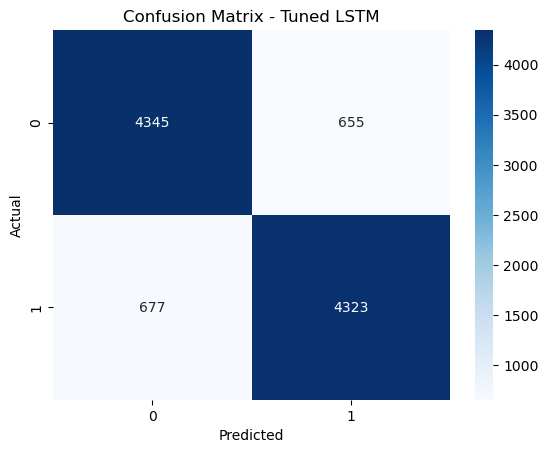

In [170]:
# Classification report LSTM after tuning 
y_pred_lstm_tuned = (best_lstm_model.predict(X_test_pad2) > 0.5).astype("int32")

print("Classification Report - Tuned LSTM")
print(classification_report(y_test, y_pred_lstm_tuned))

cm_lstm_tuned = confusion_matrix(y_test, y_pred_lstm_tuned)
sns.heatmap(cm_lstm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned LSTM")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


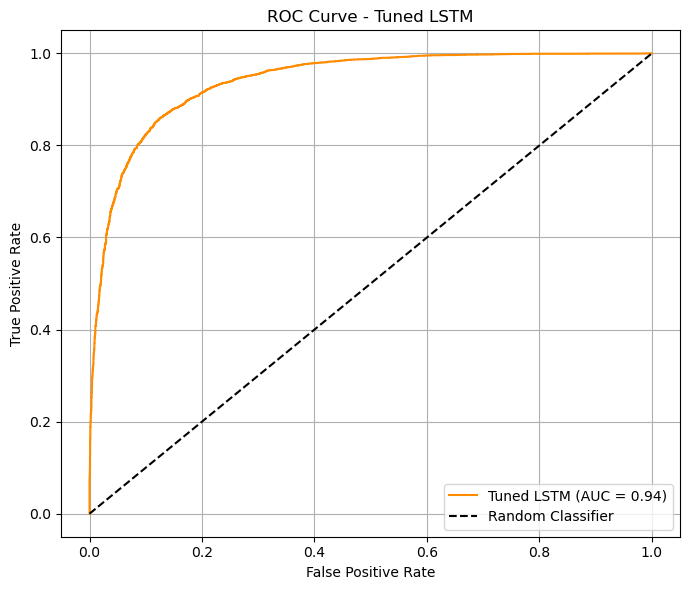

In [171]:
# ROC LSTM after tuning 

y_proba_lstm_tuned = best_lstm_model.predict(X_test_pad2).ravel()

fpr_lstm_tuned, tpr_lstm_tuned, _ = roc_curve(y_test, y_proba_lstm_tuned)
roc_auc_lstm_tuned = auc(fpr_lstm_tuned, tpr_lstm_tuned)

plt.figure(figsize=(7, 6))
plt.plot(fpr_lstm_tuned, tpr_lstm_tuned, color='darkorange', label=f"Tuned LSTM (AUC = {roc_auc_lstm_tuned:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned LSTM")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [155]:
# Hyperparameter Tuning CNN

import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=200,
                        trainable=False))
    
    model.add(Conv1D(filters=hp.Choice('filters', [64, 128, 256]),
                     kernel_size=hp.Choice('kernel_size', [3, 5, 7]),
                     activation='relu'))
    
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hp.Choice('dense_units', [32, 64]), activation='relu'))
    model.add(Dropout(hp.Choice('dropout', [0.3, 0.5, 0.6])))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=10,
                        executions_per_trial=1,
                        directory='cnn_tuning',
                        project_name='text_classification')

tuner.search(X_train_pad2, y_train, epochs=3, validation_data=(X_test_pad2, y_test))
best_model = tuner.get_best_models(num_models=1)[0]

test_loss, test_accuracy = best_model.evaluate(X_test_pad2, y_test)
print(f"Tuned CNN Accuracy on test set: {test_accuracy:.4f}")
best_model.summary()

Reloading Tuner from cnn_tuning/text_classification/tuner0.json


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.3352  
Tuned CNN Accuracy on test set: 0.8537


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 1420, 100)        │    17,559,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (32, 1418, 256)        │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (32, 256)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,653,069 (67.34 MB)

 Trainable params: 93,569 (365.50 KB)

 Non-trainable params: 17,559,500 (66.98 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  
Classification Report - Tuned CNN
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



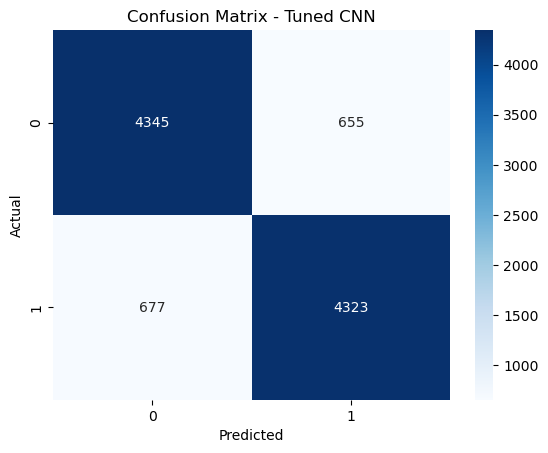

In [172]:
# Classification report CNN after tuning 
y_pred_cnn_tuned = (best_model.predict(X_test_pad2) > 0.5).astype("int32")

print("Classification Report - Tuned CNN")
print(classification_report(y_test, y_pred_cnn_tuned))

cm_cnn_tuned = confusion_matrix(y_test, y_pred_cnn_tuned)
sns.heatmap(cm_lstm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned CNN")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


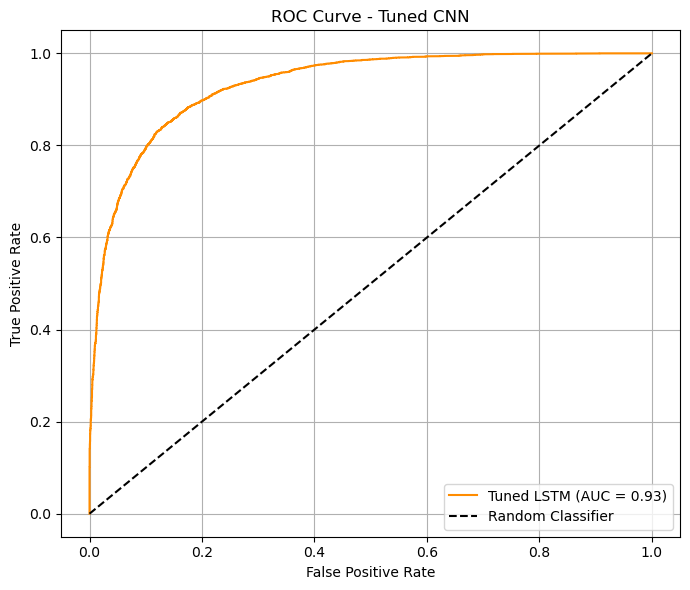

In [173]:
# ROC CNN after tuning 

y_proba_cnn_tuned = best_model.predict(X_test_pad2).ravel()

fpr_cnn_tuned, tpr_cnn_tuned, _ = roc_curve(y_test, y_proba_cnn_tuned)
roc_auc_cnn_tuned = auc(fpr_cnn_tuned, tpr_cnn_tuned)

plt.figure(figsize=(7, 6))
plt.plot(fpr_cnn_tuned, tpr_cnn_tuned, color='darkorange', label=f"Tuned LSTM (AUC = {roc_auc_cnn_tuned:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned CNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [174]:
# Model comparison

comparison_df = pd.DataFrame({
    "Model": ["Naïve Bayes", "SGD", "XGBoost", "LSTM", "CNN"],
    "Before Tuning": [accuracy_score(y_test, y_pred_nb),
                      accuracy_score(y_test, y_pred_sgd),
                      accuracy_score(y_test, y_pred_xgb),
                      lstm_acc_one,
                      cnn_acc],
    "After Tuning": [metrics.accuracy_score(y_test, y_pred_nb_tuned),
                     metrics.accuracy_score(y_test, y_pred_sgd_tuned),
                     xgb_best_score,
                     test_accuracy_lstm,
                     test_accuracy]
})

comparison_df = comparison_df.round(4)
print(comparison_df)

         Model  Before Tuning  After Tuning
0  Naïve Bayes         0.8634        0.8634
1          SGD         0.8474        0.8973
2      XGBoost         0.8564        0.8278
3         LSTM         0.6920        0.8668
4          CNN         0.8427        0.8537


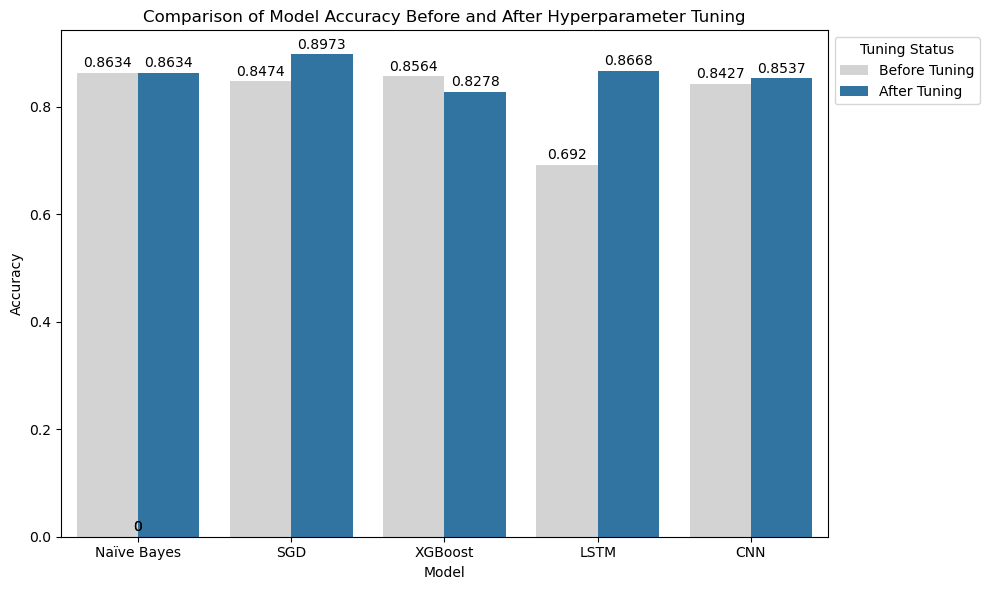

In [175]:
#  melt() to reshape the comparison_df for plotting
melted_df = comparison_df.melt(id_vars='Model', value_vars=['Before Tuning', 'After Tuning'])

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='value', hue='variable', data=melted_df, palette=["#d3d3d3", "#1f77b4"])
plt.legend(title='Tuning Status', loc='upper left', bbox_to_anchor=(1, 1))

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01, round(p.get_height(), 4),
             ha='center', color='black', fontsize=10)
    
plt.title('Comparison of Model Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 


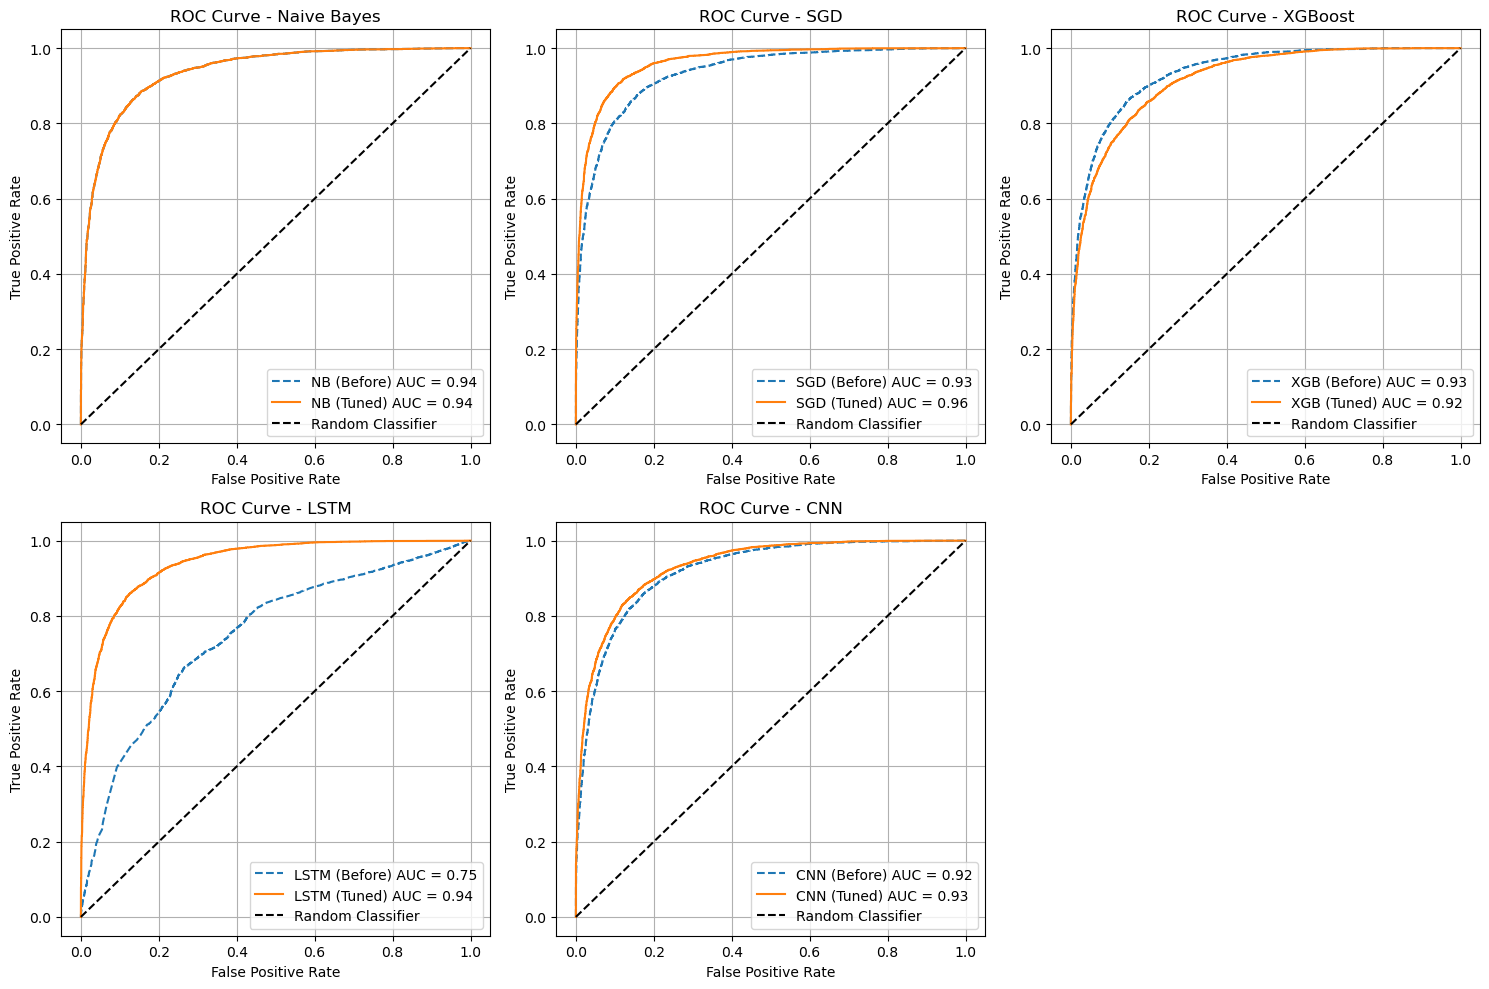

In [179]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# NB
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, nb.predict_proba(X_test_tfidf)[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)
fpr_nb_tuned, tpr_nb_tuned, _ = roc_curve(y_test_bin, grid_nb.predict_proba(X_test_tfidf)[:, 1])
auc_nb_tuned = auc(fpr_nb_tuned, tpr_nb_tuned)

axes[0, 0].plot(fpr_nb, tpr_nb, label=f'NB (Before) AUC = {auc_nb:.2f}', linestyle='--')
axes[0, 0].plot(fpr_nb_tuned, tpr_nb_tuned, label=f'NB (Tuned) AUC = {auc_nb_tuned:.2f}')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve - Naive Bayes')
axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(True)

# SGD
fpr_sgd, tpr_sgd, _ = roc_curve(y_test_bin, sgd.decision_function(X_test_tfidf))
auc_sgd = auc(fpr_sgd, tpr_sgd)
fpr_sgd_tuned, tpr_sgd_tuned, _ = roc_curve(y_test_bin, grid_sgd.decision_function(X_test_tfidf))
auc_sgd_tuned = auc(fpr_sgd_tuned, tpr_sgd_tuned)

axes[0, 1].plot(fpr_sgd, tpr_sgd, label=f'SGD (Before) AUC = {auc_sgd:.2f}', linestyle='--')
axes[0, 1].plot(fpr_sgd_tuned, tpr_sgd_tuned, label=f'SGD (Tuned) AUC = {auc_sgd_tuned:.2f}')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - SGD')
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(True)

# XGBoost 
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, xgb.predict_proba(X_test_tfidf)[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test_bin, model.predict_proba(X_test_tfidf)[:, 1])
auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)

axes[0, 2].plot(fpr_xgb, tpr_xgb, label=f'XGB (Before) AUC = {auc_xgb:.2f}', linestyle='--')
axes[0, 2].plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'XGB (Tuned) AUC = {auc_xgb_tuned:.2f}')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curve - XGBoost')
axes[0, 2].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0, 2].legend(loc='lower right')
axes[0, 2].grid(True)

# LSTM
y_proba_lstm_one = model_lstm_one.predict(X_test_pad2).ravel()
fpr_lstm_one, tpr_lstm_one, _ = roc_curve(y_test_bin, y_proba_lstm_one)
roc_auc_lstm_one = auc(fpr_lstm_one, tpr_lstm_one)
y_proba_lstm_tuned = best_lstm_model.predict(X_test_pad2).ravel()
fpr_lstm_tuned, tpr_lstm_tuned, _ = roc_curve(y_test_bin, y_proba_lstm_tuned)
roc_auc_lstm_tuned = auc(fpr_lstm_tuned, tpr_lstm_tuned)

axes[1, 0].plot(fpr_lstm_one, tpr_lstm_one, label=f'LSTM (Before) AUC = {roc_auc_lstm_one:.2f}', linestyle='--')
axes[1, 0].plot(fpr_lstm_tuned, tpr_lstm_tuned, label=f'LSTM (Tuned) AUC = {roc_auc_lstm_tuned:.2f}')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve - LSTM')
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(True)

# CNN
y_proba_cnn = model_cnn.predict(X_test_pad2).ravel()
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_bin, y_proba_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
y_proba_cnn_tuned = best_model.predict(X_test_pad2).ravel()
fpr_cnn_tuned, tpr_cnn_tuned, _ = roc_curve(y_test_bin, y_proba_cnn_tuned)
roc_auc_cnn_tuned = auc(fpr_cnn_tuned, tpr_cnn_tuned)

axes[1, 1].plot(fpr_cnn, tpr_cnn, label=f'CNN (Before) AUC = {roc_auc_cnn:.2f}', linestyle='--')
axes[1, 1].plot(fpr_cnn_tuned, tpr_cnn_tuned, label=f'CNN (Tuned) AUC = {roc_auc_cnn_tuned:.2f}')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve - CNN')
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 1].legend(loc='lower right')
axes[1, 1].grid(True)

# Empty 
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()